## Introduction/Business Problem

# Launching of New Business in Tokyo

In Japan, Tokyo is one of the popular metropolitan area. Infact, in Asia Tokyo is ranked as 1st in global economic power. It has wonderful culture and living standards. I beleive it is a perfect place to start a new business. For this project my focus will be on launching a designer boutique in most busy wards in Tokyo. In big cities like Tokyo , Clothing and styling are important factors which need to be considered in order to form a nice personality. Therefore, there will be huge scope of opportunity in such field. In this project we will go through  factors like benefits and losses of opening a designer boutique in busy wards of Tokyo.

Profit margin for retail designer boutique generally within a range of 4 percent to 13 percent. Markups also seems high as compared toCost of goods sold and other variable costs. In large cities like Tokyo the  retail industry is not only driven by the factors like price or designers but the main factors are  culture and traditons. Also Land pricing, venues and brand name. In This project our concentration area will be venue of the designer store. As the store will be open by a designer it has to be in a venue where most of the people are willing to pay for designer clothing. Our tartget segment will be people who are prone to shop designer clothes.

Correct venue of designer store will attract more customers. We will concentrate on 5 most busiest wards of Tokyo in order to anakyzing what will be the perfect venue for designer store.

  # Target Segment

a. Business Professional
b. Students
c. Housewives
d. Creative professionals.
e. miscellaneous

## Data Preparation

 I am going to use data from Wikipedia for this analysis. Firstly,i am webscrapping data from wikipedia of "Special wards of Tokyo".This data has fields like Wards name, Pouplation of a particular ward, Major districts of the ward and its coordinates with area per square Killometer.  We will use  major populated districts to get the tragetted audience and area  per square Km to understand the land price in order to select the profitable venue. For that we will use data from webpage "land market value area in Tokyo".

Then we will use Foursquare location data in order to analyze the popular spots in major districts of Tokyo. In this i will analyze Top 5 major districts of Tokyo to know their poupular spots on the basis of highest foot traffic in those areas.  Depending on that we can choose perfect venue for the designer store.

In [1]:
!pip install beautifulsoup4
!pip install lxml
!pip install folium
!pip install requests

/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: 

In [2]:
import numpy as np 

import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json 
import random
from IPython.display import Image 
from IPython.core.display import HTML 


from geopy.geocoders import Nominatim 
from bs4 import BeautifulSoup
from IPython.display import display_html
import requests 
from pandas.io.json import json_normalize 

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans


#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab

import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [3]:
source = requests.get('https://en.wikipedia.org/wiki/Special_wards_of_Tokyo').text
soup= BeautifulSoup(source,'lxml')
table_class="wikitable sortable jquery-tablesorter"
Wards_Tokyo_Table = soup.find('table', {'class':'wikitable sortable'})
print(Wards_Tokyo_Table)

<table class="wikitable sortable">
<tbody><tr>
<th>No.
</th>
<th class="unsortable">Flag
</th>
<th>Name
</th>
<th class="unsortable" width="55px">Kanji
</th>
<th>Population<br/>(as of October 2016<sup class="plainlinks noexcerpt noprint asof-tag update" style="display:none;"><a class="external text" href="https://en.wikipedia.org/w/index.php?title=Special_wards_of_Tokyo&amp;action=edit">[update]</a></sup>)
</th>
<th>Density<br/><span style="font-size:90%;">(/km<sup>2</sup>)</span>
</th>
<th>Area<br/><span style="font-size:90%;">(km<sup>2</sup>)</span>
</th>
<th class="unsortable">Major districts
</th></tr>
<tr>
<td>01</td>
<td><a class="image" href="/wiki/File:Flag_of_Chiyoda,_Tokyo.svg"><img alt="Flag of Chiyoda, Tokyo.svg" class="thumbborder" data-file-height="540" data-file-width="810" decoding="async" height="33" src="//upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Flag_of_Chiyoda%2C_Tokyo.svg/50px-Flag_of_Chiyoda%2C_Tokyo.svg.png" srcset="//upload.wikimedia.org/wikipedia/commo

In [4]:
df=pd.read_html(str(Wards_Tokyo_Table))

df=pd.DataFrame(df[0])
print(df.head())

  No. Flag      Name Kanji  Population(as of October 2016  Density(/km2)  \
0  01  NaN   Chiyoda  千代田区                          59441           5100   
1  02  NaN      Chūō   中央区                         147620          14460   
2  03  NaN    Minato    港区                         248071          12180   
3  04  NaN  Shinjuku   新宿区                         339211          18620   
4  05  NaN    Bunkyō   文京区                         223389          19790   

   Area(km2)                                    Major districts  
0      11.66  Nagatachō, Kasumigaseki, Ōtemachi, Marunouchi,...  
1      10.21  Nihonbashi, Kayabachō, Ginza, Tsukiji, Hatchōb...  
2      20.37  Odaiba, Shinbashi, Hamamatsuchō, Mita, Roppong...  
3      18.22  Shinjuku, Takadanobaba, Ōkubo, Kagurazaka, Ich...  
4      11.29                              Hongō, Yayoi, Hakusan  


In [5]:
# drop the unwanted columns
data = df.drop(["No.", "Flag","Kanji","Density(/km2)"], inplace= True, axis=1)
df.head()

,Name,Population(as of October 2016,Area(km2),Major districts
0,Chiyoda,59441,11.66,"Nagatachō, Kasumigaseki, Ōtemachi, Marunouchi,..."
1,Chūō,147620,10.21,"Nihonbashi, Kayabachō, Ginza, Tsukiji, Hatchōb..."
2,Minato,248071,20.37,"Odaiba, Shinbashi, Hamamatsuchō, Mita, Roppong..."
3,Shinjuku,339211,18.22,"Shinjuku, Takadanobaba, Ōkubo, Kagurazaka, Ich..."
4,Bunkyō,223389,11.29,"Hongō, Yayoi, Hakusan"


In [6]:
df.loc[:,"Major districts"]

0     Nagatachō, Kasumigaseki, Ōtemachi, Marunouchi,...
1     Nihonbashi, Kayabachō, Ginza, Tsukiji, Hatchōb...
2     Odaiba, Shinbashi, Hamamatsuchō, Mita, Roppong...
3     Shinjuku, Takadanobaba, Ōkubo, Kagurazaka, Ich...
4                                 Hongō, Yayoi, Hakusan
5                                         Ueno, Asakusa
6                         Kinshichō, Morishita, Ryōgoku
7     Kiba, Ariake, Kameido, Tōyōchō, Monzennakachō,...
8     Shinagawa, Gotanda, Ōsaki, Hatanodai, Ōimachi,...
9        Meguro, Nakameguro, Jiyugaoka, Komaba, Aobadai
10                  Ōmori, Kamata, Haneda, Den-en-chōfu
11          Shimokitazawa, Kinuta, Karasuyama, Tamagawa
12          Shibuya, Ebisu, Harajuku, Daikanyama, Hiroo
13                                               Nakano
14                             Kōenji, Asagaya, Ogikubo
15                 Ikebukuro, Komagome, Senkawa, Sugamo
16                                 Akabane, Ōji, Tabata
17               Arakawa, Machiya, Nippori, Mina

In [7]:
df["Major districts"].value_counts()

Nihonbashi, Kayabachō, Ginza, Tsukiji, Hatchōbori, Shinagawa, Tsukishima, Kachidoki, Tsukuda                1
Ayase, Kitasenju, Takenotsuka                                                                               1
Hongō, Yayoi, Hakusan                                                                                       1
Kōenji, Asagaya, Ogikubo                                                                                    1
Akabane, Ōji, Tabata                                                                                        1
Kiba, Ariake, Kameido, Tōyōchō, Monzennakachō, Fukagawa, Kiyosumi, Shirakawa, Etchūjima, Sunamachi, Aomi    1
Shinagawa, Gotanda, Ōsaki, Hatanodai, Ōimachi, Tennōzu                                                      1
Kinshichō, Morishita, Ryōgoku                                                                               1
Kasai, Koiwa                                                                                                1
Tateishi, 

In [8]:
for i, l in enumerate(df["Major districts"]):
    print("list",i,"is",type(1))

list 0 is <class 'int'>
list 1 is <class 'int'>
list 2 is <class 'int'>
list 3 is <class 'int'>
list 4 is <class 'int'>
list 5 is <class 'int'>
list 6 is <class 'int'>
list 7 is <class 'int'>
list 8 is <class 'int'>
list 9 is <class 'int'>
list 10 is <class 'int'>
list 11 is <class 'int'>
list 12 is <class 'int'>
list 13 is <class 'int'>
list 14 is <class 'int'>
list 15 is <class 'int'>
list 16 is <class 'int'>
list 17 is <class 'int'>
list 18 is <class 'int'>
list 19 is <class 'int'>
list 20 is <class 'int'>
list 21 is <class 'int'>
list 22 is <class 'int'>
list 23 is <class 'int'>


In [9]:
df["Major districts"] = df["Major districts"].astype('str')

In [10]:
df["Major districts"]

0     Nagatachō, Kasumigaseki, Ōtemachi, Marunouchi,...
1     Nihonbashi, Kayabachō, Ginza, Tsukiji, Hatchōb...
2     Odaiba, Shinbashi, Hamamatsuchō, Mita, Roppong...
3     Shinjuku, Takadanobaba, Ōkubo, Kagurazaka, Ich...
4                                 Hongō, Yayoi, Hakusan
5                                         Ueno, Asakusa
6                         Kinshichō, Morishita, Ryōgoku
7     Kiba, Ariake, Kameido, Tōyōchō, Monzennakachō,...
8     Shinagawa, Gotanda, Ōsaki, Hatanodai, Ōimachi,...
9        Meguro, Nakameguro, Jiyugaoka, Komaba, Aobadai
10                  Ōmori, Kamata, Haneda, Den-en-chōfu
11          Shimokitazawa, Kinuta, Karasuyama, Tamagawa
12          Shibuya, Ebisu, Harajuku, Daikanyama, Hiroo
13                                               Nakano
14                             Kōenji, Asagaya, Ogikubo
15                 Ikebukuro, Komagome, Senkawa, Sugamo
16                                 Akabane, Ōji, Tabata
17               Arakawa, Machiya, Nippori, Mina

In [11]:
df["Major districts"] = df["Major districts"].str.split(',').str[0]

In [12]:
df["Major districts"]

0         Nagatachō
1        Nihonbashi
2            Odaiba
3          Shinjuku
4             Hongō
5              Ueno
6         Kinshichō
7              Kiba
8         Shinagawa
9            Meguro
10            Ōmori
11    Shimokitazawa
12          Shibuya
13           Nakano
14           Kōenji
15        Ikebukuro
16          Akabane
17          Arakawa
18         Itabashi
19           Nerima
20            Ayase
21         Tateishi
22            Kasai
23              nan
Name: Major districts, dtype: object

In [13]:
df.head()

,Name,Population(as of October 2016,Area(km2),Major districts
0,Chiyoda,59441,11.66,Nagatachō
1,Chūō,147620,10.21,Nihonbashi
2,Minato,248071,20.37,Odaiba
3,Shinjuku,339211,18.22,Shinjuku
4,Bunkyō,223389,11.29,Hongō


In [14]:
new_name = {'Population(as of October 2016': 'Population', 'Name' : 'Ward', 'Major districts': 'Major_districts'}
df.rename(columns=new_name, inplace=True)
df.head()

,Ward,Population(as of October 2016,Area(km2),Major_districts
0,Chiyoda,59441,11.66,Nagatachō
1,Chūō,147620,10.21,Nihonbashi
2,Minato,248071,20.37,Odaiba
3,Shinjuku,339211,18.22,Shinjuku
4,Bunkyō,223389,11.29,Hongō


In [15]:
df.head(23)

,Ward,Population(as of October 2016,Area(km2),Major_districts
0,Chiyoda,59441,11.66,Nagatachō
1,Chūō,147620,10.21,Nihonbashi
2,Minato,248071,20.37,Odaiba
3,Shinjuku,339211,18.22,Shinjuku
4,Bunkyō,223389,11.29,Hongō
5,Taitō,200486,10.11,Ueno
6,Sumida,260358,13.77,Kinshichō
7,Kōtō,502579,40.16,Kiba
8,Shinagawa,392492,22.84,Shinagawa
9,Meguro,280283,14.67,Meguro


In [16]:
df.shape

(24, 4)

In [17]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="Tokyo_explorer")
df['Major_districts_coord']=df['Ward'].apply(geolocator.geocode)
df.head(23)

,Ward,Population(as of October 2016,Area(km2),Major_districts,Major_districts_coord
0,Chiyoda,59441,11.66,Nagatachō,"(千代田区, 東京都, 日本, (35.6938097, 139.7532163))"
1,Chūō,147620,10.21,Nihonbashi,"(中央区, 東京都, 日本, (35.666255, 139.775565))"
2,Minato,248071,20.37,Odaiba,"(港区, 東京都, 日本, (35.6432274, 139.7400553))"
3,Shinjuku,339211,18.22,Shinjuku,"(新宿区, 東京都, 日本, (35.6937632, 139.7036319))"
4,Bunkyō,223389,11.29,Hongō,"(文京区, 東京都, 日本, (35.71881, 139.744732))"
5,Taitō,200486,10.11,Ueno,"(台東区, 東京都, 日本, (35.71745, 139.790859))"
6,Sumida,260358,13.77,Kinshichō,"(墨田区, 東京都, 日本, (35.700429, 139.805017))"
7,Kōtō,502579,40.16,Kiba,"(江東区, 東京都, 日本, (35.649154, 139.81279))"
8,Shinagawa,392492,22.84,Shinagawa,"(品川区, 東京都, 日本, (35.599252, 139.73891))"
9,Meguro,280283,14.67,Meguro,"(目黒区, 東京都, 日本, (35.62125, 139.688014))"


In [18]:
df['Major_districts_coord'] = df['Major_districts_coord'].apply(lambda x: (x.latitude,x.longitude))
df.head(23)

,Ward,Population(as of October 2016,Area(km2),Major_districts,Major_districts_coord
0,Chiyoda,59441,11.66,Nagatachō,"(35.6938097, 139.7532163)"
1,Chūō,147620,10.21,Nihonbashi,"(35.666255, 139.775565)"
2,Minato,248071,20.37,Odaiba,"(35.6432274, 139.7400553)"
3,Shinjuku,339211,18.22,Shinjuku,"(35.6937632, 139.7036319)"
4,Bunkyō,223389,11.29,Hongō,"(35.71881, 139.744732)"
5,Taitō,200486,10.11,Ueno,"(35.71745, 139.790859)"
6,Sumida,260358,13.77,Kinshichō,"(35.700429, 139.805017)"
7,Kōtō,502579,40.16,Kiba,"(35.649154, 139.81279)"
8,Shinagawa,392492,22.84,Shinagawa,"(35.599252, 139.73891)"
9,Meguro,280283,14.67,Meguro,"(35.62125, 139.688014)"


In [19]:
df["Major_districts_coord"] = df["Major_districts_coord"].astype('str')

In [20]:
df["Major_districts_coord"]

0     (35.6938097, 139.7532163)
1       (35.666255, 139.775565)
2     (35.6432274, 139.7400553)
3     (35.6937632, 139.7036319)
4        (35.71881, 139.744732)
5        (35.71745, 139.790859)
6       (35.700429, 139.805017)
7        (35.649154, 139.81279)
8        (35.599252, 139.73891)
9        (35.62125, 139.688014)
10      (35.561206, 139.715843)
11       (35.646096, 139.65627)
12    (35.6645956, 139.6987107)
13      (35.718123, 139.664468)
14    (35.6994929, 139.6362876)
15      (35.736156, 139.714222)
16    (-0.2201641, -78.5123274)
17       (35.737529, 139.78131)
18      (35.774143, 139.681209)
19       (35.74836, 139.638735)
20      (35.783703, 139.795319)
21      (35.751733, 139.863816)
22      (35.678278, 139.871091)
23    (38.8056247, -78.3447236)
Name: Major_districts_coord, dtype: object

In [21]:
split_data = df.Major_districts_coord.str.strip(')').str.strip('(').str.split(', ')

In [22]:
df['latitude'] = split_data.apply(lambda x: x[0])
df['longitude'] = split_data.apply(lambda x: x[1])

In [23]:
df.head(23)

,Ward,Population(as of October 2016,Area(km2),Major_districts,Major_districts_coord,latitude,longitude
0,Chiyoda,59441,11.66,Nagatachō,"(35.6938097, 139.7532163)",35.6938097,139.7532163
1,Chūō,147620,10.21,Nihonbashi,"(35.666255, 139.775565)",35.666255,139.775565
2,Minato,248071,20.37,Odaiba,"(35.6432274, 139.7400553)",35.6432274,139.7400553
3,Shinjuku,339211,18.22,Shinjuku,"(35.6937632, 139.7036319)",35.6937632,139.7036319
4,Bunkyō,223389,11.29,Hongō,"(35.71881, 139.744732)",35.71881,139.744732
5,Taitō,200486,10.11,Ueno,"(35.71745, 139.790859)",35.71745,139.790859
6,Sumida,260358,13.77,Kinshichō,"(35.700429, 139.805017)",35.700429,139.805017
7,Kōtō,502579,40.16,Kiba,"(35.649154, 139.81279)",35.649154,139.81279
8,Shinagawa,392492,22.84,Shinagawa,"(35.599252, 139.73891)",35.599252,139.73891
9,Meguro,280283,14.67,Meguro,"(35.62125, 139.688014)",35.62125,139.688014


In [24]:
source = requests.get('https://utinokati.com/en/details/land-market-value/area/Tokyo/').text
soup= BeautifulSoup(source,'lxml')
table_class="table table-condensed table-bordered table-center"
land_market_value = soup.find('table', {'class':'table table-condensed table-bordered table-center'})
print(land_market_value)

<table class="table table-condensed table-bordered table-center" id="region_overview"><thead><tr class="bg-warning"><th class="col-sm-4">Area</th><th class="col-sm-3">Average Trading Price</th><th class="col-sm-3">Average Unit Price</th><th class="col-sm-2">#</th></tr></thead><tbody><tr><td class="mobile-left"><a href="/en/details/land-market-value/area/Tokyo-ChiyodaKu/" title="Chiyoda-Ku Land market value">Chiyoda-Ku</a></td><td>357,150,000 JPY</td><td>2,839,779 JPY/sq.m</td><td>284 件</td></tr><tr><td class="mobile-left"><a href="/en/details/land-market-value/area/Tokyo-ChuoKu/" title="Chuo-Ku Land market value">Chuo-Ku</a></td><td>230,547,945 JPY</td><td>1,876,597 JPY/sq.m</td><td>425 件</td></tr><tr><td class="mobile-left"><a href="/en/details/land-market-value/area/Tokyo-MinatoKu/" title="Minato-Ku Land market value">Minato-Ku</a></td><td>413,870,370 JPY</td><td>2,075,876 JPY/sq.m</td><td>703 件</td></tr><tr><td class="mobile-left"><a href="/en/details/land-market-value/area/Tokyo-Sh

In [25]:
df2=pd.read_html(str(land_market_value))

df2=pd.DataFrame(df2[0])
print(df2.head())

          Area Average Trading Price  Average Unit Price        #
0   Chiyoda-Ku       357,150,000 JPY  2,839,779 JPY/sq.m    284 件
1      Chuo-Ku       230,547,945 JPY  1,876,597 JPY/sq.m    425 件
2    Minato-Ku       413,870,370 JPY  2,075,876 JPY/sq.m    703 件
3  Shinjuku-Ku       125,146,667 JPY    875,098 JPY/sq.m  1,518 件
4    Bunkyo-Ku        98,009,118 JPY    952,715 JPY/sq.m  1,553 件


In [26]:
data = df2.drop(["Average Unit Price", "#" ], inplace= True, axis=1)

In [27]:
df2.head(6)

,Area,Average Trading Price
0,Chiyoda-Ku,"357,150,000 JPY"
1,Chuo-Ku,"230,547,945 JPY"
2,Minato-Ku,"413,870,370 JPY"
3,Shinjuku-Ku,"125,146,667 JPY"
4,Bunkyo-Ku,"98,009,118 JPY"
5,Taito-Ku,"116,206,030 JPY"


In [28]:
new_name2 = { 'Average Trading Price': 'Average_Trading_Price'}
df2.rename(columns=new_name2, inplace=True)
df2.head(6)

,Area,Average_Trading_Price
0,Chiyoda-Ku,"357,150,000 JPY"
1,Chuo-Ku,"230,547,945 JPY"
2,Minato-Ku,"413,870,370 JPY"
3,Shinjuku-Ku,"125,146,667 JPY"
4,Bunkyo-Ku,"98,009,118 JPY"
5,Taito-Ku,"116,206,030 JPY"


In [29]:
df2.shape

(54, 2)

In [30]:
df2["Area"] = df2["Area"].astype('str')

In [31]:
df2["Area"] = df2["Area"].str.split('-').str[0]

In [32]:
df2

,Area,Average_Trading_Price
0,Chiyoda,"357,150,000 JPY"
1,Chuo,"230,547,945 JPY"
2,Minato,"413,870,370 JPY"
3,Shinjuku,"125,146,667 JPY"
4,Bunkyo,"98,009,118 JPY"
5,Taito,"116,206,030 JPY"
6,Sumida,"79,983,746 JPY"
7,Koto,"81,056,211 JPY"
8,Shinagawa,"82,823,404 JPY"
9,Meguro,"115,496,306 JPY"


In [33]:
Tokyo_df = pd.merge(df, df2, how='inner', left_on = 'Ward', right_on = 'Area')
Tokyo_df

,Ward,Population(as of October 2016,Area(km2),Major_districts,Major_districts_coord,latitude,longitude,Area,Average_Trading_Price
0,Chiyoda,59441,11.66,Nagatachō,"(35.6938097, 139.7532163)",35.6938097,139.7532163,Chiyoda,"357,150,000 JPY"
1,Minato,248071,20.37,Odaiba,"(35.6432274, 139.7400553)",35.6432274,139.7400553,Minato,"413,870,370 JPY"
2,Shinjuku,339211,18.22,Shinjuku,"(35.6937632, 139.7036319)",35.6937632,139.7036319,Shinjuku,"125,146,667 JPY"
3,Sumida,260358,13.77,Kinshichō,"(35.700429, 139.805017)",35.700429,139.805017,Sumida,"79,983,746 JPY"
4,Shinagawa,392492,22.84,Shinagawa,"(35.599252, 139.73891)",35.599252,139.73891,Shinagawa,"82,823,404 JPY"
5,Meguro,280283,14.67,Meguro,"(35.62125, 139.688014)",35.62125,139.688014,Meguro,"115,496,306 JPY"
6,Setagaya,910868,58.05,Shimokitazawa,"(35.646096, 139.65627)",35.646096,139.65627,Setagaya,"96,334,278 JPY"
7,Shibuya,227850,15.11,Shibuya,"(35.6645956, 139.6987107)",35.6645956,139.6987107,Shibuya,"175,901,942 JPY"
8,Nakano,332902,15.59,Nakano,"(35.718123, 139.664468)",35.718123,139.664468,Nakano,"80,381,799 JPY"
9,Suginami,570483,34.06,Kōenji,"(35.6994929, 139.6362876)",35.6994929,139.6362876,Suginami,"82,343,488 JPY"


In [34]:
data = Tokyo_df.drop(["Area","Major_districts_coord"], inplace= True, axis=1)

In [35]:
Tokyo_df

,Ward,Population(as of October 2016,Area(km2),Major_districts,latitude,longitude,Average_Trading_Price
0,Chiyoda,59441,11.66,Nagatachō,35.6938097,139.7532163,"357,150,000 JPY"
1,Minato,248071,20.37,Odaiba,35.6432274,139.7400553,"413,870,370 JPY"
2,Shinjuku,339211,18.22,Shinjuku,35.6937632,139.7036319,"125,146,667 JPY"
3,Sumida,260358,13.77,Kinshichō,35.700429,139.805017,"79,983,746 JPY"
4,Shinagawa,392492,22.84,Shinagawa,35.599252,139.73891,"82,823,404 JPY"
5,Meguro,280283,14.67,Meguro,35.62125,139.688014,"115,496,306 JPY"
6,Setagaya,910868,58.05,Shimokitazawa,35.646096,139.65627,"96,334,278 JPY"
7,Shibuya,227850,15.11,Shibuya,35.6645956,139.6987107,"175,901,942 JPY"
8,Nakano,332902,15.59,Nakano,35.718123,139.664468,"80,381,799 JPY"
9,Suginami,570483,34.06,Kōenji,35.6994929,139.6362876,"82,343,488 JPY"


In [36]:
pd.options.mode.chained_assignment = None
ward_list = ['Chiyoda', 'Minato', 'Shinjuku', 'Sumida', 'Shinagawa']
Tokyo_df_selected = Tokyo_df.loc[Tokyo_df['Ward'].isin(ward_list)]
Tokyo_df_selected.index = np.arange(1, len(Tokyo_df_selected) + 1)
Tokyo_df_selected

,Ward,Population(as of October 2016,Area(km2),Major_districts,latitude,longitude,Average_Trading_Price
1,Chiyoda,59441,11.66,Nagatachō,35.6938097,139.7532163,"357,150,000 JPY"
2,Minato,248071,20.37,Odaiba,35.6432274,139.7400553,"413,870,370 JPY"
3,Shinjuku,339211,18.22,Shinjuku,35.6937632,139.7036319,"125,146,667 JPY"
4,Sumida,260358,13.77,Kinshichō,35.700429,139.805017,"79,983,746 JPY"
5,Shinagawa,392492,22.84,Shinagawa,35.599252,139.73891,"82,823,404 JPY"


In [37]:
from geopy.geocoders import Nominatim 
address = 'Tokyo'

geolocator = Nominatim(user_agent="Tokyo_explorer")
location = geolocator.geocode(address)
Tokyo_latitude = location.latitude
Tokyo_longitude = location.longitude
print('The geograpical coordinates of Tokyo are {}, {}.'.format(Tokyo_latitude, Tokyo_longitude))

The geograpical coordinates of Tokyo are 35.6828387, 139.7594549.


In [38]:
import folium

Tokyo_5Wards = folium.Map(location=[Tokyo_latitude, Tokyo_longitude], zoom_start=12)

# add markers to map
for lat, lng, label in zip(Tokyo_df_selected['latitude'], Tokyo_df_selected['longitude'], 
                           Tokyo_df_selected['Major_districts']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=9,
        popup=label,
        color='magenta',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(Tokyo_5Wards)  
    
Tokyo_5Wards

In [39]:
CLIENT_ID = 'ETJKZJM4NVDRYCEYC24ZZ4AOCWCGJRJWFWVCBJOXFX2WQLCW' #'your-client-ID' # your Foursquare ID
CLIENT_SECRET = 'MODVOYN24QC1XBWCEGCFGWXLWBU3YB5NVK5T1KS404ZNCCFC' #'your-client-secret' # your Foursquare Secret
VERSION = '20190325' # Foursquare API version

print('My credentails:')
print('My CLIENT_ID: ' + CLIENT_ID)
print('My CLIENT_SECRET:' + CLIENT_SECRET)

My credentails:
My CLIENT_ID: ETJKZJM4NVDRYCEYC24ZZ4AOCWCGJRJWFWVCBJOXFX2WQLCW
My CLIENT_SECRET:MODVOYN24QC1XBWCEGCFGWXLWBU3YB5NVK5T1KS404ZNCCFC


In [40]:
radius = 2000
LIMIT = 100

def getNearbyVenues(names, latitudes, longitudes, radius=2000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?categoryId=4bf58dd8d48988d103951735,4bf58dd8d48988d104951735&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
          
    # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['District', 
                  'latitude', 
                  'longitude', 
                  'Venue', 
                  'Venue_Lat', 
                  'Venue_Long', 
                  'Venue_Category']
    
    return(nearby_venues)

In [41]:
Tokyo_5_Dist_Venues = getNearbyVenues(names=Tokyo_df_selected['Major_districts'],
                                   latitudes=Tokyo_df_selected['latitude'],
                                   longitudes=Tokyo_df_selected['longitude']
                                  )

Nagatachō
Odaiba
Shinjuku
Kinshichō
Shinagawa


In [42]:
print ("Shape of the Venues Dataframe: ", Tokyo_5_Dist_Venues.shape)
Tokyo_5_Dist_Venues.tail(500)

Shape of the Venues Dataframe:  (287, 7)


,District,latitude,longitude,Venue,Venue_Lat,Venue_Long,Venue_Category
0,Nagatachō,35.6938097,139.7532163,UNITED ARROWS,35.682325,139.764074,Boutique
1,Nagatachō,35.6938097,139.7532163,Maker's Shirt Kamakura (メーカーズシャツ鎌倉),35.681178,139.763764,Clothing Store
2,Nagatachō,35.6938097,139.7532163,S&Graf,35.703134,139.771488,Clothing Store
3,Nagatachō,35.6938097,139.7532163,Brooks Brothers,35.679272,139.762569,Clothing Store
4,Nagatachō,35.6938097,139.7532163,MUJI (無印良品),35.697918,139.773770,Clothing Store
5,Nagatachō,35.6938097,139.7532163,MUJI com,35.692874,139.735664,Clothing Store
6,Nagatachō,35.6938097,139.7532163,TOMORROWLAND,35.680227,139.762987,Clothing Store
7,Nagatachō,35.6938097,139.7532163,さかいやスポーツ シューズ館,35.696764,139.757647,Shoe Store
8,Nagatachō,35.6938097,139.7532163,BEAMS,35.682199,139.764532,Boutique
9,Nagatachō,35.6938097,139.7532163,UNIQLO (ユニクロ),35.691192,139.735908,Clothing Store


In [43]:
Tokyo_5_Dist_Venues_only_Boutique = Tokyo_5_Dist_Venues[Tokyo_5_Dist_Venues['Venue_Category']\
                                                          .str.contains('Boutique')].reset_index(drop=True)
Tokyo_5_Dist_Venues_only_Boutique.index = np.arange(1, len(Tokyo_5_Dist_Venues_only_Boutique)+1)
print ("Shape of the Data-Frame with Venue Category only Boutique: ", Tokyo_5_Dist_Venues_only_Boutique.shape)
Tokyo_5_Dist_Venues_only_Boutique.head()

Shape of the Data-Frame with Venue Category only Boutique:  (37, 7)


,District,latitude,longitude,Venue,Venue_Lat,Venue_Long,Venue_Category
1,Nagatachō,35.6938097,139.7532163,UNITED ARROWS,35.682325,139.764074,Boutique
2,Nagatachō,35.6938097,139.7532163,BEAMS,35.682199,139.764532,Boutique
3,Nagatachō,35.6938097,139.7532163,WEGO,35.706621,139.753336,Boutique
4,Nagatachō,35.6938097,139.7532163,DRESSTERIOR MARUNOUCHI SALON,35.681837,139.765196,Boutique
5,Nagatachō,35.6938097,139.7532163,Hat Shop Knowledge,35.701409,139.770918,Boutique


In [44]:
map_Boutique = folium.Map(location=[Tokyo_latitude, Tokyo_longitude], zoom_start=11, tiles="openstreetmap", 
                            attr="<a href=https://github.com/python-visualization/folium/>Folium</a>")

# set color scheme for the Venues based on the Major Districts
Districts = ['Nagatachō', 'Odaiba', 'Shinjuku', 'Kinshichō', 'Shinagawa']

x = np.arange(len(Districts))

rainbow = ['#00ff00', '#ff00ff','#0000ff','#ffa500' ,'#ff0000']

# add markers to the map
# markers_colors = []
for lat, lon, poi, distr in zip(Tokyo_5_Dist_Venues_only_Boutique['Venue_Lat'], 
                                  Tokyo_5_Dist_Venues_only_Boutique['Venue_Long'], 
                                  Tokyo_5_Dist_Venues_only_Boutique['Venue_Category'], 
                                  Tokyo_5_Dist_Venues_only_Boutique['District']):
    label = folium.Popup(str(poi) + ' ' + str(distr), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=15,
        popup=label,
        color=rainbow[Districts.index(distr)-1],
        fill=True,
        fill_color=rainbow[Districts.index(distr)-1],
        fill_opacity=0.3).add_to(map_Boutique)
       
map_Boutique

In [45]:
### Number of Unique Categories in the Dataframe 
print('There are {} unique categories.'.format(len(Tokyo_5_Dist_Venues['Venue_Category'].unique())))
## We can check some of the categories randomly  
print (Tokyo_5_Dist_Venues[['Venue_Category']][70:75])

There are 19 unique categories.
       Venue_Category
70        Men's Store
71        Men's Store
72  Accessories Store
73  Accessories Store
74       Costume Shop


In [46]:
print (Tokyo_5_Dist_Venues['Venue_Category'].value_counts())

Clothing Store            146
Boutique                   37
Shoe Store                 28
Men's Store                28
Women's Store              25
Accessories Store           6
Arts & Crafts Store         3
Kids Store                  2
Sporting Goods Shop         2
Optical Shop                1
Café                        1
Furniture / Home Store      1
Costume Shop                1
Luggage Store               1
Lingerie Store              1
Hobby Shop                  1
Miscellaneous Shop          1
Outdoor Supply Store        1
Jewelry Store               1
Name: Venue_Category, dtype: int64


In [47]:
# create a dataframe of top 10 categories
Tokyo_5_Dist_Venues_Top10 = Tokyo_5_Dist_Venues['Venue_Category'].value_counts()[0:10].to_frame(name='frequency')
Tokyo_5_Dist_Venues_Top10=Tokyo_5_Dist_Venues_Top10.reset_index()
#Tokyo_5_Dist_Venues_Top10

Tokyo_5_Dist_Venues_Top10.rename(index=str, columns={"index": "Venue_Category", "frequency": "Frequency"}, inplace=True)
Tokyo_5_Dist_Venues_Top10

,Venue_Category,Frequency
0,Clothing Store,146
1,Boutique,37
2,Shoe Store,28
3,Men's Store,28
4,Women's Store,25
5,Accessories Store,6
6,Arts & Crafts Store,3
7,Kids Store,2
8,Sporting Goods Shop,2
9,Optical Shop,1


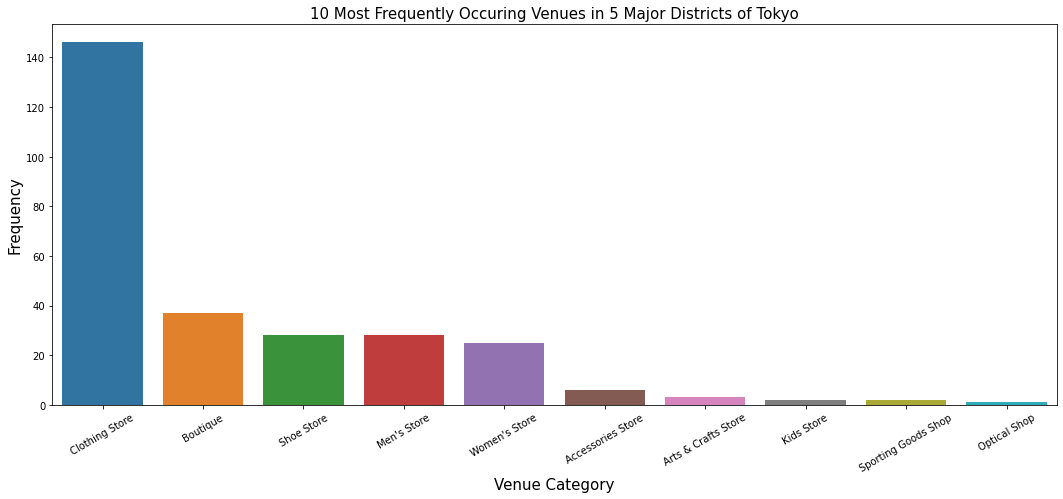

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(18,7))
s=sns.barplot(x="Venue_Category", y="Frequency", data=Tokyo_5_Dist_Venues_Top10)
s.set_xticklabels(s.get_xticklabels(), rotation=30)
plt.title('10 Most Frequently Occuring Venues in 5 Major Districts of Tokyo', fontsize=15)
plt.xlabel("Venue Category", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.savefig("Most_Freq_Venues.png", dpi=300)
plt.show()

Restaurants and Bars are Most Frequent Venues in 5 Major Districts of Tokyo

### Use One Hot Encoding to Get More Information about the Venue Categories 

In [49]:
Tokyo_5_Dist_Venues_onehot = pd.get_dummies(Tokyo_5_Dist_Venues[['Venue_Category']], prefix="", prefix_sep="")

### add district column back to dataframe
Tokyo_5_Dist_Venues_onehot['District'] = Tokyo_5_Dist_Venues['District'] 
### move district column to the first column
fixed_columns = [Tokyo_5_Dist_Venues_onehot.columns[-1]] + list(Tokyo_5_Dist_Venues_onehot.columns[:-1])
Tokyo_5_Dist_Venues_onehot = Tokyo_5_Dist_Venues_onehot[fixed_columns]

In [50]:
Tokyo_5_Dist_Venues_Grouped = Tokyo_5_Dist_Venues_onehot.groupby('District').mean().reset_index()
Tokyo_5_Dist_Venues_Grouped.index = np.arange(1, len(Tokyo_5_Dist_Venues_Grouped)+1)
Tokyo_5_Dist_Venues_Grouped

,District,Accessories Store,Arts & Crafts Store,Boutique,Café,Clothing Store,Costume Shop,Furniture / Home Store,Hobby Shop,Jewelry Store,Kids Store,Lingerie Store,Luggage Store,Men's Store,Miscellaneous Shop,Optical Shop,Outdoor Supply Store,Shoe Store,Sporting Goods Shop,Women's Store
1,Kinshichō,0.043478,0.028986,0.043478,0.000000,0.608696,0.000000,0.000000,0.014493,0.000000,0.014493,0.014493,0.00,0.057971,0.00,0.00,0.00,0.130435,0.00,0.043478
2,Nagatachō,0.039474,0.000000,0.131579,0.013158,0.434211,0.013158,0.000000,0.000000,0.013158,0.000000,0.000000,0.00,0.184211,0.00,0.00,0.00,0.105263,0.00,0.065789
3,Odaiba,0.000000,0.000000,0.100000,0.000000,0.550000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.05,0.050000,0.05,0.05,0.00,0.150000,0.00,0.000000
4,Shinagawa,0.000000,0.000000,0.000000,0.000000,0.409091,0.000000,0.045455,0.000000,0.000000,0.045455,0.000000,0.00,0.181818,0.00,0.00,0.00,0.181818,0.00,0.136364
5,Shinjuku,0.000000,0.010000,0.220000,0.000000,0.510000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.050000,0.00,0.00,0.01,0.040000,0.02,0.140000


In [51]:
num_top_venues = 5

for places in Tokyo_5_Dist_Venues_Grouped['District']:
    print("%%%%%%%%%"+places+"%%%%%%%%")
    temp = Tokyo_5_Dist_Venues_Grouped[Tokyo_5_Dist_Venues_Grouped['District'] == places].T.reset_index()
    temp.columns = ['Venue','Freq']
    temp = temp.iloc[1:]
    temp['Freq'] = temp['Freq'].astype(float)
    temp = temp.round({'Freq': 2})
    print(temp.sort_values('Freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

%%%%%%%%%Kinshichō%%%%%%%%
               Venue  Freq
0     Clothing Store  0.61
1         Shoe Store  0.13
2        Men's Store  0.06
3  Accessories Store  0.04
4      Women's Store  0.04


%%%%%%%%%Nagatachō%%%%%%%%
            Venue  Freq
0  Clothing Store  0.43
1     Men's Store  0.18
2        Boutique  0.13
3      Shoe Store  0.11
4   Women's Store  0.07


%%%%%%%%%Odaiba%%%%%%%%
            Venue  Freq
0  Clothing Store  0.55
1      Shoe Store  0.15
2        Boutique  0.10
3   Luggage Store  0.05
4    Optical Shop  0.05


%%%%%%%%%Shinagawa%%%%%%%%
                    Venue  Freq
0          Clothing Store  0.41
1              Shoe Store  0.18
2             Men's Store  0.18
3           Women's Store  0.14
4  Furniture / Home Store  0.05


%%%%%%%%%Shinjuku%%%%%%%%
            Venue  Freq
0  Clothing Store  0.51
1        Boutique  0.22
2   Women's Store  0.14
3     Men's Store  0.05
4      Shoe Store  0.04




## Define a Function to select the top 10 rows (According to the Values) 
create Dataframe

In [52]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['District']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
District_top10_venues_sorted = pd.DataFrame(columns=columns)
District_top10_venues_sorted['District'] = Tokyo_5_Dist_Venues_Grouped['District']

for ind in np.arange(Tokyo_5_Dist_Venues_Grouped.shape[0]):
    District_top10_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Tokyo_5_Dist_Venues_Grouped.iloc[ind, :], num_top_venues)

    
District_top10_venues_sorted.index = np.arange(1, len(District_top10_venues_sorted)+1)
District_top10_venues_sorted.head(5)

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Kinshichō,Clothing Store,Shoe Store,Men's Store,Women's Store,Boutique,Accessories Store,Arts & Crafts Store,Lingerie Store,Hobby Shop,Kids Store
2,Nagatachō,Clothing Store,Men's Store,Boutique,Shoe Store,Women's Store,Accessories Store,Jewelry Store,Costume Shop,Café,Miscellaneous Shop
3,Odaiba,Clothing Store,Shoe Store,Boutique,Optical Shop,Miscellaneous Shop,Men's Store,Luggage Store,Women's Store,Furniture / Home Store,Arts & Crafts Store
4,Shinagawa,Clothing Store,Men's Store,Shoe Store,Women's Store,Furniture / Home Store,Kids Store,Miscellaneous Shop,Luggage Store,Lingerie Store,Sporting Goods Shop
5,Shinjuku,Clothing Store,Boutique,Women's Store,Men's Store,Shoe Store,Sporting Goods Shop,Outdoor Supply Store,Arts & Crafts Store,Furniture / Home Store,Café


## Category plot

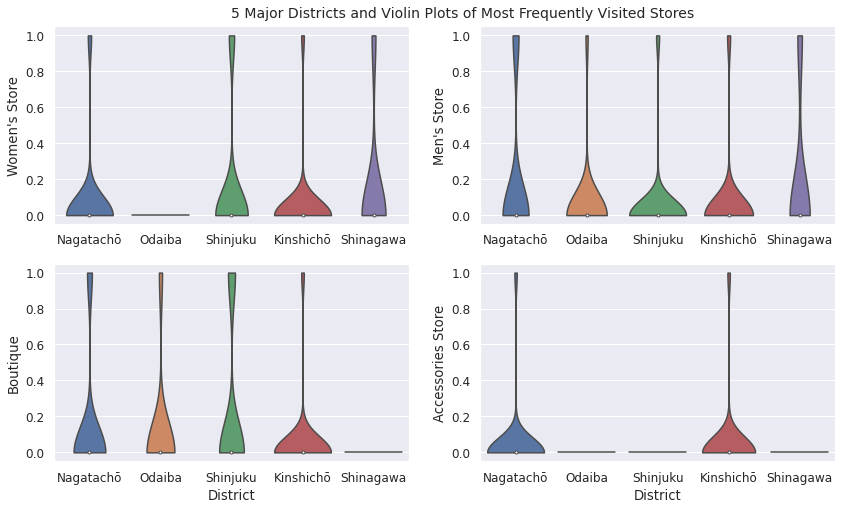

In [53]:
fig = plt.figure(figsize=(14,8))

sns.set(font_scale=1.1)
ax = plt.subplot(2,2,1)
sns.violinplot(x="District", y="Women's Store", data=Tokyo_5_Dist_Venues_onehot, cut=0);
plt.xlabel("")
ax = plt.subplot(2,2,2)
sns.violinplot(x="District", y="Men's Store", data=Tokyo_5_Dist_Venues_onehot, cut=0);
plt.xlabel("")
plt.subplot(2,2,3)
sns.violinplot(x="District", y="Boutique", data=Tokyo_5_Dist_Venues_onehot, cut=0);
plt.subplot(2,2,4)
sns.violinplot(x="District", y="Accessories Store", data=Tokyo_5_Dist_Venues_onehot, cut=0);
#ax.title.set_text("5 Major Districts and Violin Plots of Most Frequently Visited Restaurants")
ax.text(-4.0, 1.1, '5 Major Districts and Violin Plots of Most Frequently Visited Stores', fontsize=14)
plt.savefig ("Violin_plots_Dist_Frequent_Stores.png", dpi=240)
plt.show()

[3, 10, 2, 0, 22]


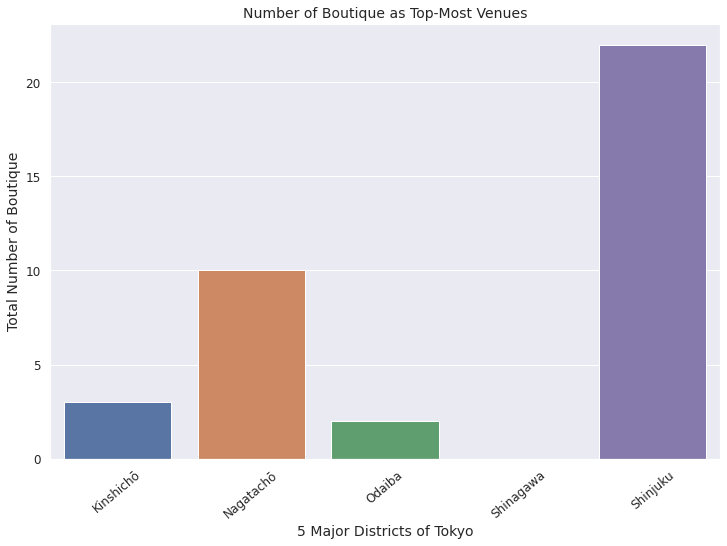

In [54]:
#try groupby to play with Boutique
Tokyo_5_Dist_Venues_Boutique = Tokyo_5_Dist_Venues.groupby(['District'])['Venue_Category'].apply(lambda x: x[x.str.contains('Boutique')].count())
Tokyo_5_Dist_Venues_Boutique_df = Tokyo_5_Dist_Venues_Boutique.to_frame().reset_index()
Tokyo_5_Dist_Venues_Boutique_df.columns = ['District', 'Number of Boutique']
#Tokyo_5_Dist_Venues_Boutique.columns = ['District', 'Number of Boutique']
#print (type(Tokyo_5_Dist_Venues_Clothing Store))
Tokyo_5_Dist_Venues_Boutique_df.index = np.arange(1, len(Tokyo_5_Dist_Venues_Boutique_df)+1)

#print ("shape of the dataframe: ", Tokyo_5_Dist_Venues_Boutique_df.shape)
#print (Tokyo_5_Dist_Venues_Boutique_df.head(5))
#print (type(Tokyo_5_Dist_Venues_Boutique_df[['Number of Boutique']]))
list_rest_no = Tokyo_5_Dist_Venues_Boutique_df['Number of Boutique'].to_list()
print (list_rest_no)
fig = plt.figure(figsize=(12,8))
bar = sns.barplot(x='District', y='Number of Boutique', data=Tokyo_5_Dist_Venues_Boutique_df)

bar.set_ylabel("Total Number of Boutique", fontsize=14)
bar.set_xlabel("5 Major Districts of Tokyo", fontsize=14)
bar.set_xticklabels(bar.get_xticklabels(),rotation=40)
bar.set_title("Number of Boutique as Top-Most Venues", fontsize=14)
#plt.savefig("No_of_Rest_as_Top_Venues.png", dpi=240)
plt.show()

## Clustering the Tokyo Districts (Neighborhoods) using K-Means

In [55]:
kclusters = 3

Tokyo_grouped_clustering = Tokyo_5_Dist_Venues_Grouped.drop('District', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Tokyo_grouped_clustering)

# check cluster labels generated for each row in the dataframe
print ("Check the 5 Cluster labels :",  kmeans.labels_[0:5])

Check the 5 Cluster labels : [2 1 2 1 0]


In [56]:
# add clustering labels

District_top10_venues_sorted.insert(0, 'Cluster Label', kmeans.labels_)

Tokyo_5_Dist_Coordinate_Cluster_merged = Tokyo_df_selected

#merge the inital Tokyo Dataframe with Sorted Most Visited places for each neighborhood

Tokyo_5_Dist_Coordinate_Cluster_merged = Tokyo_5_Dist_Coordinate_Cluster_merged.join \
                                        (District_top10_venues_sorted.set_index('District'), on='Major_districts')

Tokyo_5_Dist_Coordinate_Cluster_merged.head()

,Ward,Population(as of October 2016,Area(km2),Major_districts,latitude,longitude,Average_Trading_Price,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Chiyoda,59441,11.66,Nagatachō,35.6938097,139.7532163,"357,150,000 JPY",1,Clothing Store,Men's Store,Boutique,Shoe Store,Women's Store,Accessories Store,Jewelry Store,Costume Shop,Café,Miscellaneous Shop
2,Minato,248071,20.37,Odaiba,35.6432274,139.7400553,"413,870,370 JPY",2,Clothing Store,Shoe Store,Boutique,Optical Shop,Miscellaneous Shop,Men's Store,Luggage Store,Women's Store,Furniture / Home Store,Arts & Crafts Store
3,Shinjuku,339211,18.22,Shinjuku,35.6937632,139.7036319,"125,146,667 JPY",0,Clothing Store,Boutique,Women's Store,Men's Store,Shoe Store,Sporting Goods Shop,Outdoor Supply Store,Arts & Crafts Store,Furniture / Home Store,Café
4,Sumida,260358,13.77,Kinshichō,35.700429,139.805017,"79,983,746 JPY",2,Clothing Store,Shoe Store,Men's Store,Women's Store,Boutique,Accessories Store,Arts & Crafts Store,Lingerie Store,Hobby Shop,Kids Store
5,Shinagawa,392492,22.84,Shinagawa,35.599252,139.73891,"82,823,404 JPY",1,Clothing Store,Men's Store,Shoe Store,Women's Store,Furniture / Home Store,Kids Store,Miscellaneous Shop,Luggage Store,Lingerie Store,Sporting Goods Shop


In [57]:
map_clusters = folium.Map(location=[Tokyo_latitude, Tokyo_longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Tokyo_5_Dist_Coordinate_Cluster_merged['latitude'], 
                                  Tokyo_5_Dist_Coordinate_Cluster_merged['longitude'], 
                                  Tokyo_5_Dist_Coordinate_Cluster_merged['Major_districts'], 
                                  Tokyo_5_Dist_Coordinate_Cluster_merged['Cluster Label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=8,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [58]:
# create map
map_Boutique10= folium.Map(location=[Tokyo_latitude, Tokyo_longitude], tiles='cartodbpositron', 
                               attr="<a href=https://github.com/python-visualization/folium/>Folium</a>")

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
#rainbow = ['#00ff00', '#ff00ff','#0000ff','#ffa500' ,'#ff0000']
Districts = ['Nagatachō', 'Odaiba', 'Shinjuku', 'Kinshichō', 'Shinagawa']

# add markers to the map
for lat, lon, poi, cluster in zip(Tokyo_5_Dist_Coordinate_Cluster_merged['latitude'], 
                                  Tokyo_5_Dist_Coordinate_Cluster_merged['longitude'], 
                                  Tokyo_5_Dist_Coordinate_Cluster_merged['Major_districts'], 
                                  Tokyo_5_Dist_Coordinate_Cluster_merged['Cluster Label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=list_rest_no[Districts.index(poi)]*0.5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_Boutique10)
       
map_Boutique10

## Cluster 3

In [59]:
Tokyo_Cluster1 = Tokyo_5_Dist_Coordinate_Cluster_merged.loc[Tokyo_5_Dist_Coordinate_Cluster_merged['Cluster Label'] == 0, 
                                    Tokyo_5_Dist_Coordinate_Cluster_merged.columns[[3] + list(range(4, Tokyo_5_Dist_Coordinate_Cluster_merged.shape[1]))]]
print ("No of Neighbourhood in Cluster Label 0: %d" %(Tokyo_Cluster1.shape[0]))
Tokyo_Cluster1

No of Neighbourhood in Cluster Label 0: 1


,Major_districts,latitude,longitude,Average_Trading_Price,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Shinjuku,35.6937632,139.7036319,"125,146,667 JPY",0,Clothing Store,Boutique,Women's Store,Men's Store,Shoe Store,Sporting Goods Shop,Outdoor Supply Store,Arts & Crafts Store,Furniture / Home Store,Café


# Cluster 1

In [60]:
Tokyo_Cluster2 = Tokyo_5_Dist_Coordinate_Cluster_merged.loc[Tokyo_5_Dist_Coordinate_Cluster_merged['Cluster Label'] == 1, 
                                    Tokyo_5_Dist_Coordinate_Cluster_merged.columns[[3] + list(range(4, Tokyo_5_Dist_Coordinate_Cluster_merged.shape[1]))]]
print ("No of Neighbourhood in Cluster Label 1: %d" %(Tokyo_Cluster2.shape[0]))
Tokyo_Cluster2

No of Neighbourhood in Cluster Label 1: 2


,Major_districts,latitude,longitude,Average_Trading_Price,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Nagatachō,35.6938097,139.7532163,"357,150,000 JPY",1,Clothing Store,Men's Store,Boutique,Shoe Store,Women's Store,Accessories Store,Jewelry Store,Costume Shop,Café,Miscellaneous Shop
5,Shinagawa,35.599252,139.73891,"82,823,404 JPY",1,Clothing Store,Men's Store,Shoe Store,Women's Store,Furniture / Home Store,Kids Store,Miscellaneous Shop,Luggage Store,Lingerie Store,Sporting Goods Shop


# cluster 2

In [61]:
Tokyo_Cluster3 = Tokyo_5_Dist_Coordinate_Cluster_merged.loc[Tokyo_5_Dist_Coordinate_Cluster_merged['Cluster Label'] == 2, 
                                    Tokyo_5_Dist_Coordinate_Cluster_merged.columns[[3] + list(range(4, Tokyo_5_Dist_Coordinate_Cluster_merged.shape[1]))]]
print ("No of Neighbourhood in Cluster Label 2: %d" %(Tokyo_Cluster3.shape[0]))
Tokyo_Cluster3

No of Neighbourhood in Cluster Label 2: 2


,Major_districts,latitude,longitude,Average_Trading_Price,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Odaiba,35.6432274,139.7400553,"413,870,370 JPY",2,Clothing Store,Shoe Store,Boutique,Optical Shop,Miscellaneous Shop,Men's Store,Luggage Store,Women's Store,Furniture / Home Store,Arts & Crafts Store
4,Kinshichō,35.700429,139.805017,"79,983,746 JPY",2,Clothing Store,Shoe Store,Men's Store,Women's Store,Boutique,Accessories Store,Arts & Crafts Store,Lingerie Store,Hobby Shop,Kids Store


## Conclusion

Hence, there are three major districts in which most of the clothing store and Boutique exist and as the designer boutiques are less in no. we can predict a good possability of new designer boutiue in Shinagawa, Nagatachō and Odaiba. The Boutiques are either 3rd most or 2nd most common venues which means the foot traffic in Tokyo's major dictricts are interested in looking at the boutique to make new purchases. By looking at the clusters we can figure out that all the major districts's are crowded by clothing store or shoe store and there are less designer boutiques therefore a designer boutique for both men and women can be a profitable business to launch.

As per the clusters we can see that as there are less no. of boutiques in Kinshichō and Shinagawa,which means if a designer boutique is launch in this particular area there will be less competition. Chance of getting notice and earning profitablity in this sector will be high for new launched boutique. 